In [1]:
import ac
from eval import *
from glob import glob

try:
    multiprocessing.set_start_method('spawn')
except RuntimeError:
    pass

mpl.style.use('bmh')

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
%matplotlib inline

In [19]:
checkpoints = sorted(glob('/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/*'), key=dictsort)

In [20]:
checkpoints

['/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-0.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-1.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-2.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-3.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-4.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-5.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-6.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-7.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-8.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-9.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-10.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-11.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-12.pth',
 '/mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/poli

In [5]:
runs = 200
envname = 'DeepRM-v0'

In [6]:
workload = deeprm.deeprm_env.DEFAULT_WORKLOAD.copy()
workload['new_job_rate'] = .3

In [7]:
env = setup_environment(envname, workload=workload)
policy = ac.PGNet(env).cuda()
sjf = SJFAgent(env)
data = OrderedDict()
before = []

env = envname
policy.share_memory()
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:

    data['random'] = pool.map(
        run_model,
        [(env, policy, i, False, workload) for i in range(runs)]
    )

    for checkpoint in checkpoints:
        print(f'Loading (or trying to load) {checkpoint}')
        policy.load_state_dict(torch.load(
            checkpoint
        ))
        data[checkpoint] = pool.map(
            run_model,
            [(env, policy, i, False, workload) for i in range(runs)]
        )

    data['sjf'] = pool.map(
        run_model,
        [(env, sjf, i, True, workload) for i in range(runs)]
    )

slowdown_data = {
    k: [e[1] for e in data[k]] for k in sorted(data.keys(), key=dictsort)
}

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-0.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-1.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-2.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-3.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-4.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-5.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-6.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-7.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-8.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-9.pth
Loading (or trying to load) /mnt/main/sc

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-85.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-86.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-87.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-88.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-89.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-90.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-91.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-92.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-93.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-94.pth
Loading (or trying to load) /m

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-169.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-170.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-171.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-172.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-173.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-174.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-175.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-176.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-177.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-178.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-253.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-254.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-255.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-256.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-257.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-258.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-259.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-260.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-261.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-262.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-337.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-338.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-339.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-340.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-341.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-342.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-343.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-344.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-345.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-346.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-421.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-422.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-423.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-424.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-425.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-426.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-427.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-428.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-429.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-430.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-505.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-506.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-507.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-508.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-509.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-510.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-511.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-512.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-513.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-514.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-589.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-590.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-591.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-592.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-593.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-594.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-595.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-596.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-597.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-598.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-673.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-674.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-675.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-676.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-677.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-678.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-679.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-680.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-681.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-682.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-757.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-758.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-759.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-760.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-761.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-762.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-763.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-764.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-765.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-766.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-841.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-842.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-843.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-844.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-845.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-846.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-847.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-848.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-849.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-850.pth
Loading (or trying t

Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-925.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-926.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-927.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-928.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-929.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-930.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-931.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-932.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-933.pth
Loading (or trying to load) /mnt/main/sched-rl-sim-all-workers-baseline/checkpoint/policy-934.pth
Loading (or trying t

In [60]:
reward_data = {
    k: [e[0] for e in data[k]] for k in sorted(data.keys(), key=dictsort)
}

In [61]:
slowdown_data = {
    k: [e[1] for e in data[k]] for k in sorted(data.keys(), key=dictsort)
}

In [63]:
for k in [k for k in reward_data.keys()]:
    try:
        int(dictsort(k))
    except (ValueError, TypeError):
        continue
    reward_data[int(dictsort(k))] = reward_data[k]

In [64]:
for k in [k for k in slowdown_data.keys()]:
    try:
        int(dictsort(k))
    except (ValueError, TypeError):
        continue
    slowdown_data[int(dictsort(k))] = slowdown_data[k]

In [65]:
len(slowdown_data), len(reward_data)

(2002, 2002)

In [67]:
keys = sorted([k for k in reward_data.keys() if isinstance(k, int)])

In [68]:
len(keys)

1000

In [69]:
mean_rewards, std_rewards = [np.sum(reward_data[k]) for k in keys], [np.std(reward_data[k]) for k in keys]

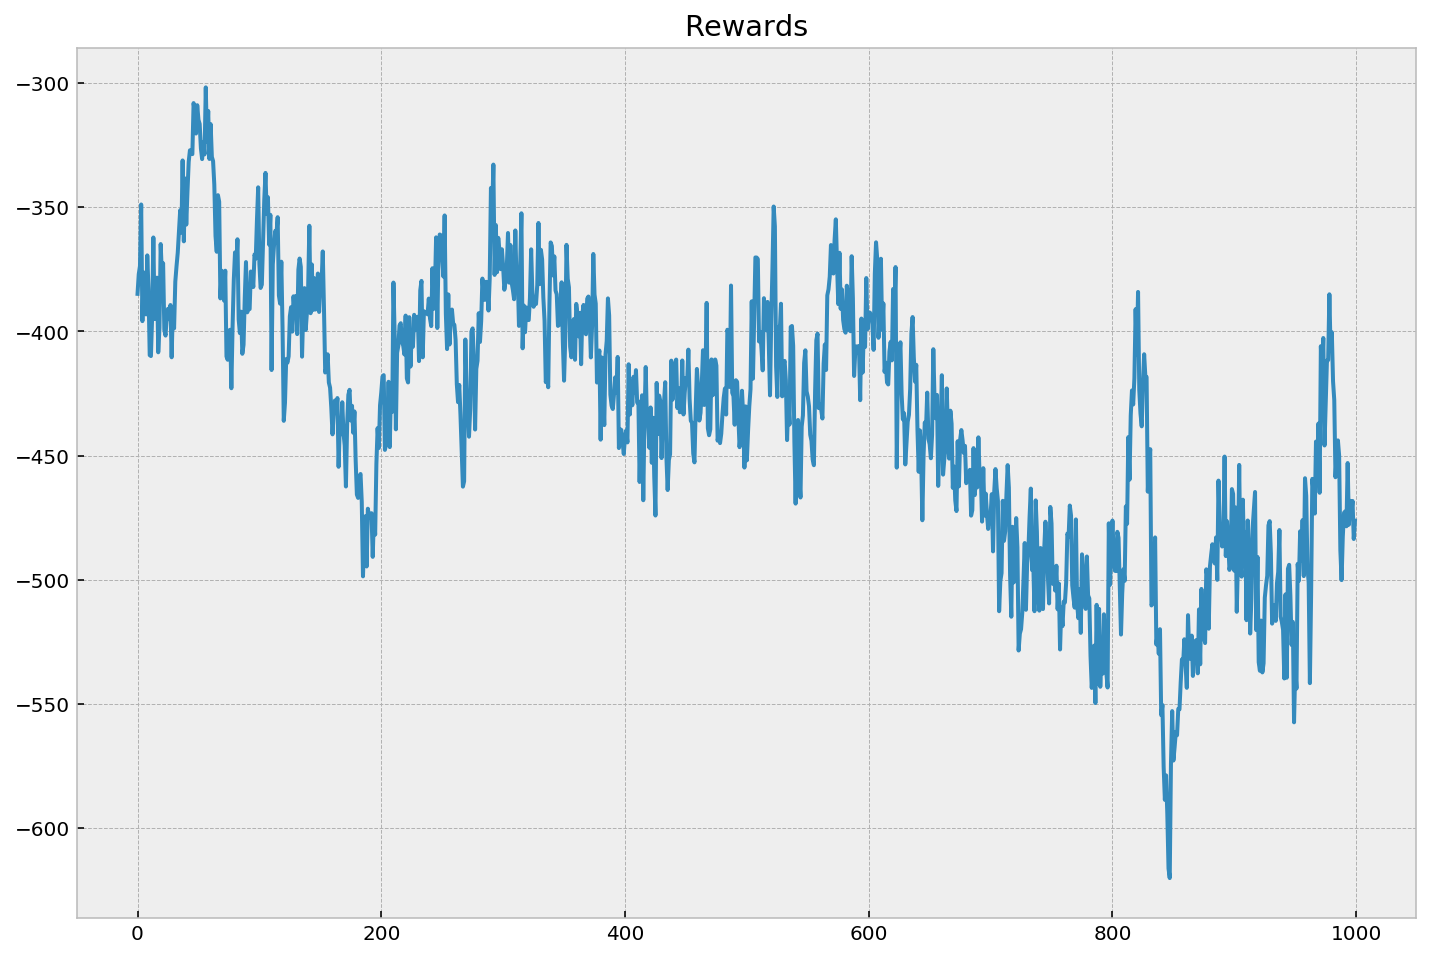

In [70]:
plt.figure(figsize=(12,8))
plt.title('Rewards')
plt.plot(mean_rewards)

In [72]:
mean_slowdown, std_slowdown = [np.mean(slowdown_data[k]) for k in keys], [np.std(slowdown_data[k]) for k in keys]

In [74]:
len(mean_slowdown)

1000

In [78]:
mean_slowdown

[6.408941404104553,
 6.287508312346393,
 5.82031215620899,
 5.636882768862608,
 5.455892014680245,
 4.668608223933955,
 4.670167640368289,
 4.576049801434135,
 4.516687769439555,
 4.405802833860464,
 4.563371347369562,
 4.44057575078541,
 4.794223751909466,
 4.774219650839781,
 4.59947963840813,
 5.0092112424402195,
 4.365488193318688,
 4.709390461069114,
 4.5398864057148955,
 4.4166788814720634,
 4.658434291075687,
 4.332462870670095,
 4.169826454924345,
 4.210020143802206,
 3.8181585706681487,
 3.853307429475287,
 3.9738053207374633,
 3.6905904204261346,
 4.462604261677476,
 4.202241115753534,
 4.494056958022137,
 4.388140022261289,
 4.347969659001459,
 4.204364621483615,
 4.6276944724257225,
 4.484831397537648,
 4.368858070897357,
 4.24165099021349,
 3.634439135023226,
 4.251988873064766,
 4.1410104901742075,
 3.942789346316863,
 3.7559340348804637,
 4.117820041643934,
 3.9833673433498915,
 4.203851717883118,
 4.4591544472963305,
 4.198963219035053,
 4.33330809855128,
 4.15944941882

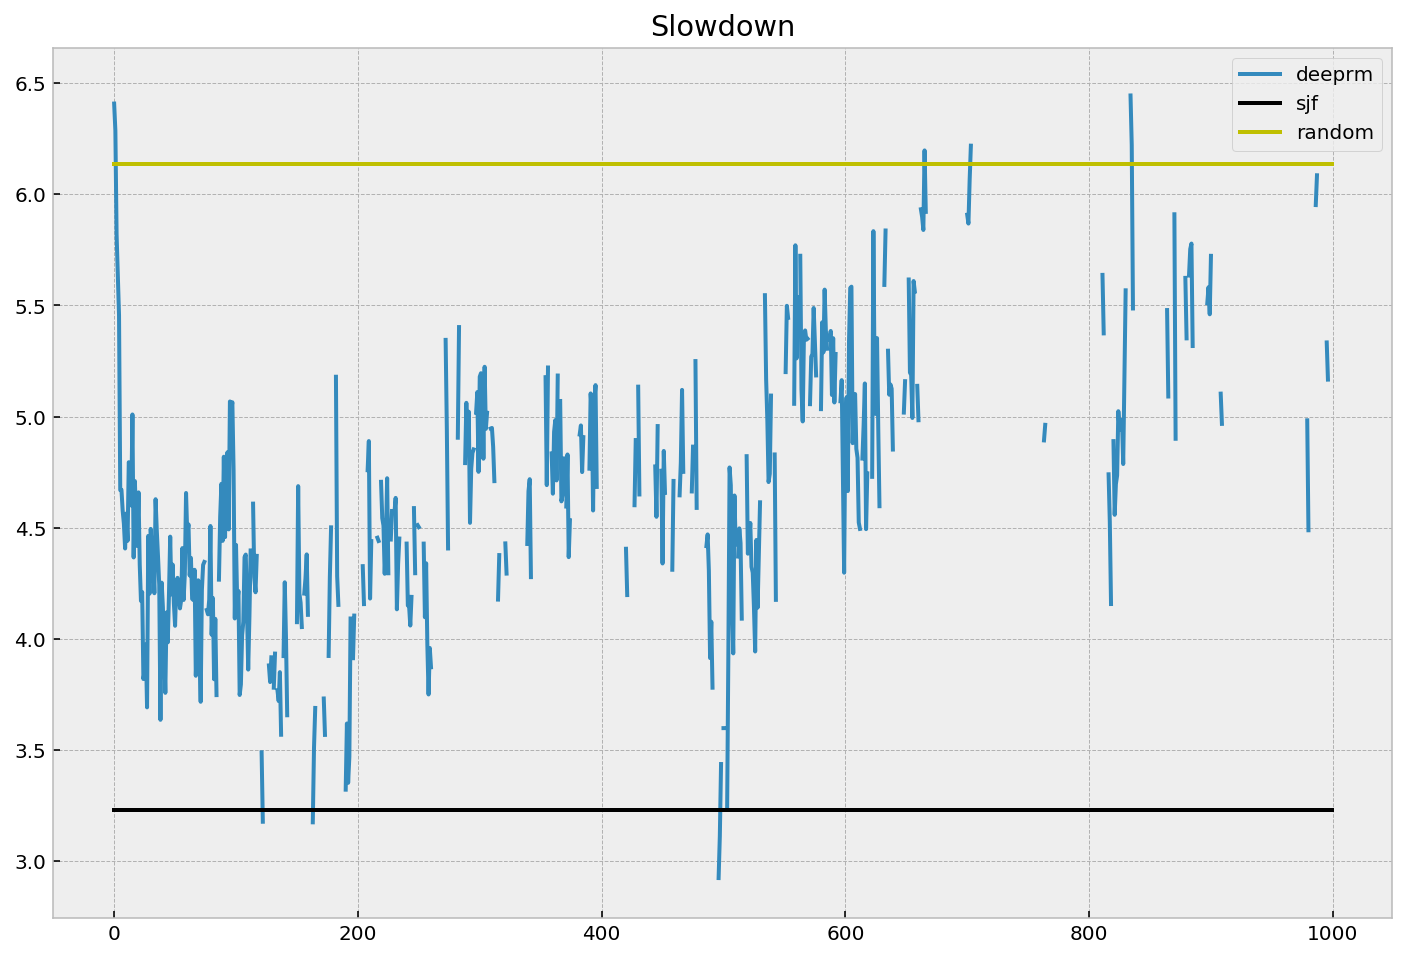

In [77]:
plt.figure(figsize=(12,8))
plt.title('Slowdown')
plt.plot(mean_slowdown, label='deeprm')
plt.plot(range(len(mean_slowdown)), [np.mean(slowdown_data['sjf'])] * len(mean_slowdown), 'k', label='sjf')
plt.plot(range(len(mean_slowdown)), [np.mean(slowdown_data['random'])] * len(mean_slowdown), 'y', label='random')
plt.legend()
plt.savefig('reproducing.pdf')

In [81]:
sns.set()

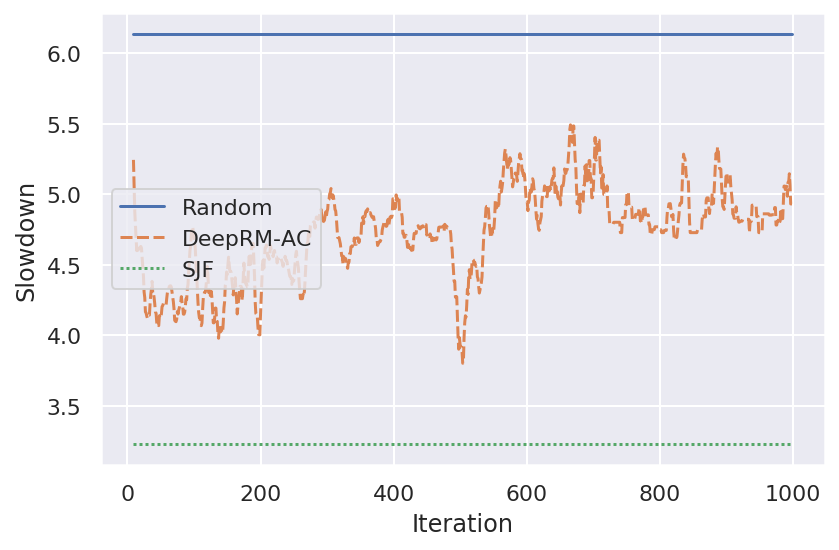

In [96]:
imputer = IterativeImputer()
data = pd.DataFrame({
    'Random': [np.mean(slowdown_data['random'])] * len(mean_slowdown),
    'DeepRM-AC': imputer.fit_transform(np.array(mean_slowdown).reshape(-1, 1)).reshape((-1,)),
    'SJF': [np.mean(slowdown_data['sjf'])] * len(mean_slowdown),
}).rolling(window=10).mean()

ax = sns.lineplot(err_style='band', data=data)
ax.set_ylabel('Slowdown')
ax.set_xlabel('Iteration')
plt.tight_layout()
plt.savefig('b.pdf')

In [90]:
data = pd.DataFrame({
    'Random': [np.mean(slowdown_data['random'])] * len(mean_slowdown),
    'DeepRM': mean_slowdown,
    'SJF': [np.mean(slowdown_data['sjf'])] * len(mean_slowdown),
})
imputer = IterativeImputer()
data = imputer.fit_transform(data)
data

array([[6.13814497, 6.4089414 , 3.22835372],
       [6.13814497, 6.28750831, 3.22835372],
       [6.13814497, 5.82031216, 3.22835372],
       ...,
       [6.13814497, 4.72848222, 3.22835372],
       [6.13814497, 4.72848222, 3.22835372],
       [6.13814497, 4.72848222, 3.22835372]])

In [87]:
!pip install scikit-learn

     |████████████████████████████████| 6.8 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 7.1 MB/s eta 0:00:01
